In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

In [2]:

# Fetch data
ticker = "^NDX"  # NASDAQ 100
data = yf.download(ticker, period="max", interval="1d")[['Close']]

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [ ]:
# Create sequences
def create_sequences(data, seq_length, dates):
    X, y, seq_dates = [], [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
        seq_dates.append(dates[i+seq_length])
    return np.array(X), np.array(y), seq_dates

seq_length = 60
X, y, dates = create_sequences(data_scaled, seq_length, data.index)

In [5]:
# Split into training and testing
train_size = int(len(X) * 0.8)
X_train, y_train, train_dates = X[:train_size], y[:train_size], dates[:train_size]
X_test, y_test, test_dates = X[train_size:], y[train_size:], dates[train_size:]


In [ ]:
configs = [
    {'epochs': 20, 'batch_size': 32},
    {'epochs': 50, 'batch_size': 32},
    {'epochs': 20, 'batch_size': 64},
    {'epochs': 50, 'batch_size': 64}
]

results = {}



Training model with epochs=20 and batch_size=32
Epoch 1/20


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


247/247 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 6.4674e-04 - val_loss: 0.0038
Epoch 2/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 5.3353e-05 - val_loss: 5.6815e-04
Epoch 3/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 4.2448e-05 - val_loss: 6.4080e-04
Epoch 4/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 4.4229e-05 - val_loss: 3.4308e-04
Epoch 5/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 3.8909e-05 - val_loss: 3.6097e-04
Epoch 6/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 4.3475e-05 - val_loss: 8.6833e-04
Epoch 7/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 3.7534e-05 - val_loss: 4.2070e-04
Epoch 8/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 3.8143e-05 - val_loss: 2.4696e-04
Epoch 9/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 3.2611e-05 - val_loss: 3.2194e-04
Epoch 10/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 3.9140e-05 - val_loss: 0.0022
Epoch 11/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 3.9385

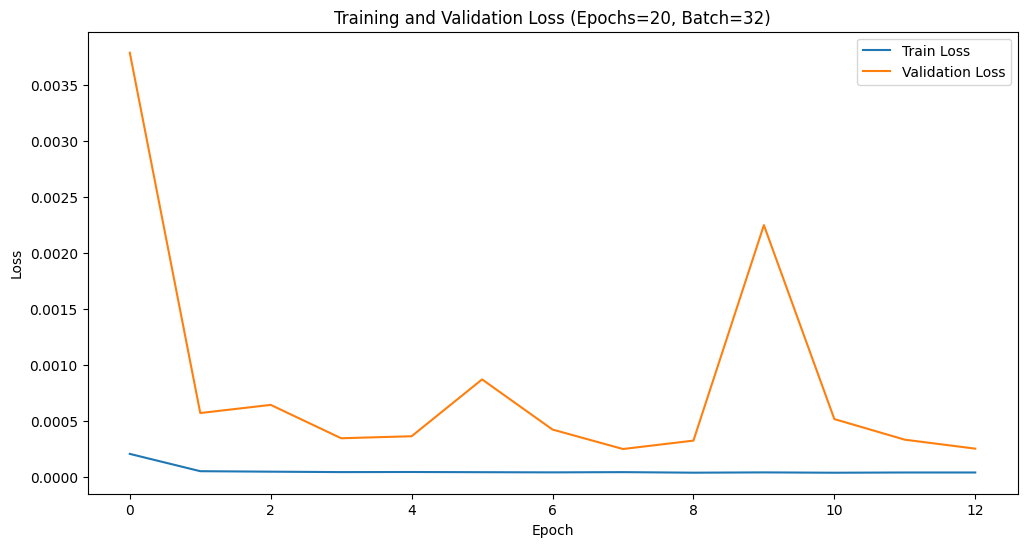

62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


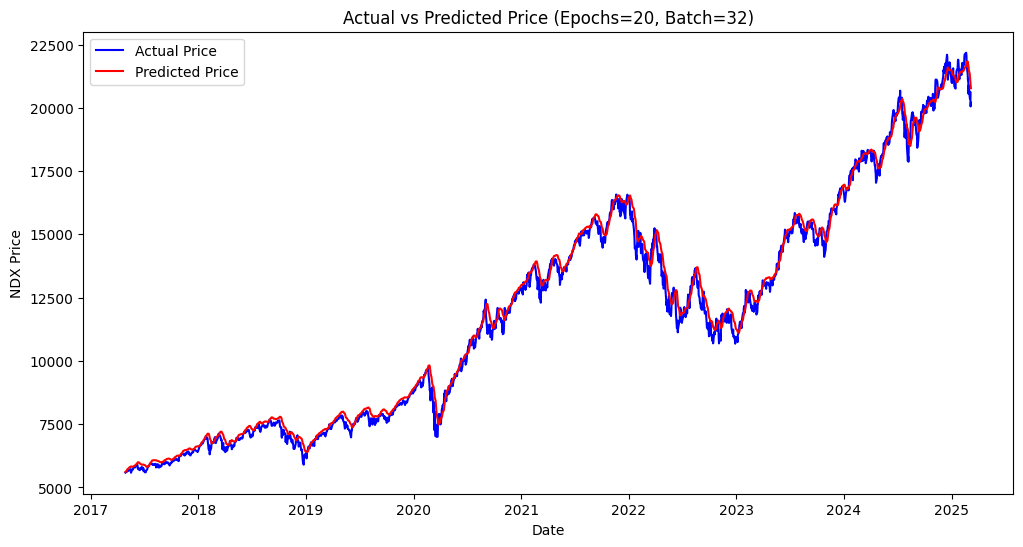

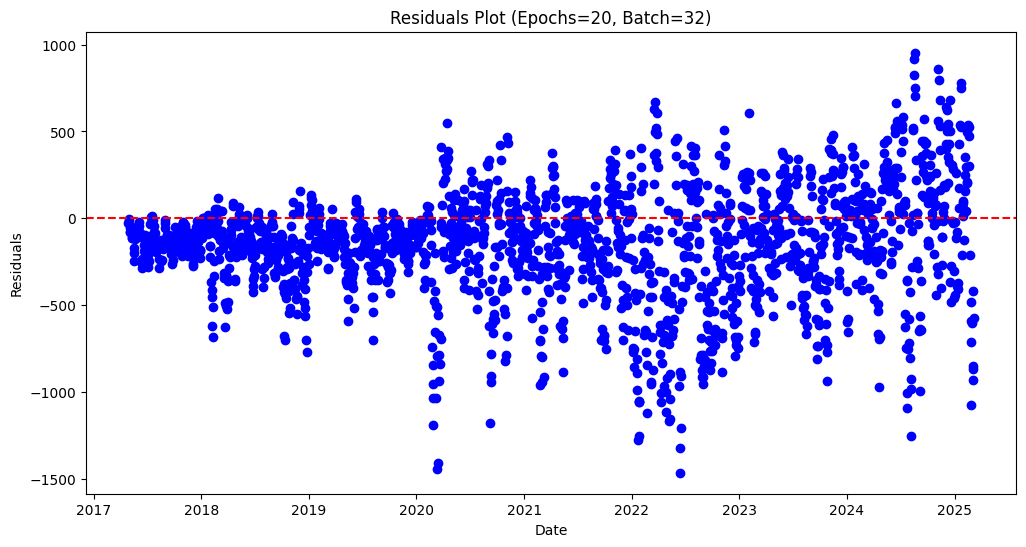

Metrics for Epochs=20, Batch=32
MSE: 120275.5250, RMSE: 346.8076, MAE: 255.7035, MAPE: 2.29%
R2 Score: 0.9941, Explained Variance: 0.9951, Directional Accuracy: 52.30%

Training model with epochs=50 and batch_size=32
Epoch 1/50


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


247/247 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 6.0835e-04 - val_loss: 3.6197e-04
Epoch 2/50
247/247 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 4.5909e-05 - val_loss: 0.0019
Epoch 3/50
247/247 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 3.9523e-05 - val_loss: 0.0023
Epoch 4/50
247/247 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 4.2118e-05 - val_loss: 0.0010
Epoch 5/50
247/247 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 3.5166e-05 - val_loss: 0.0020
Epoch 6/50
247/247 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 4.2424e-05 - val_loss: 0.0030


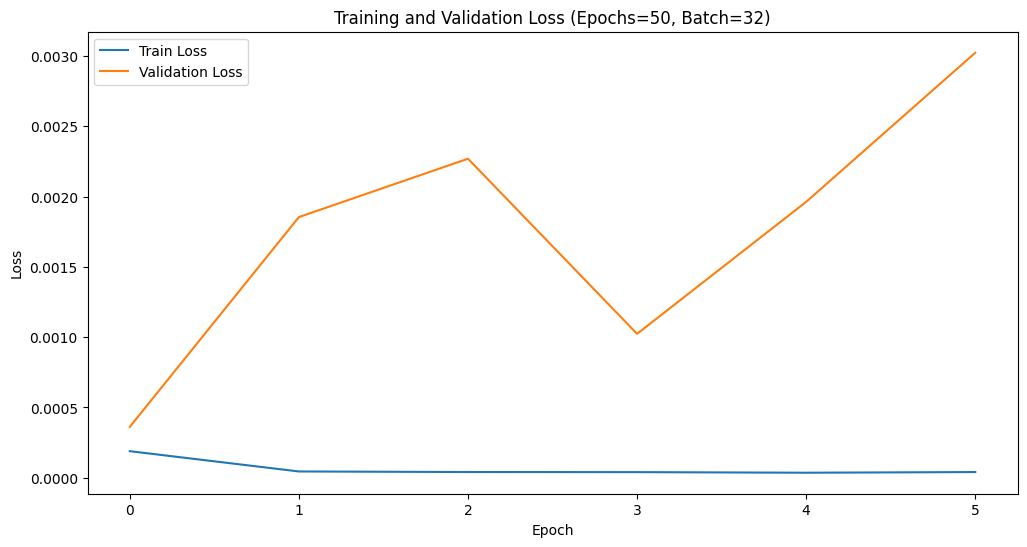

62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


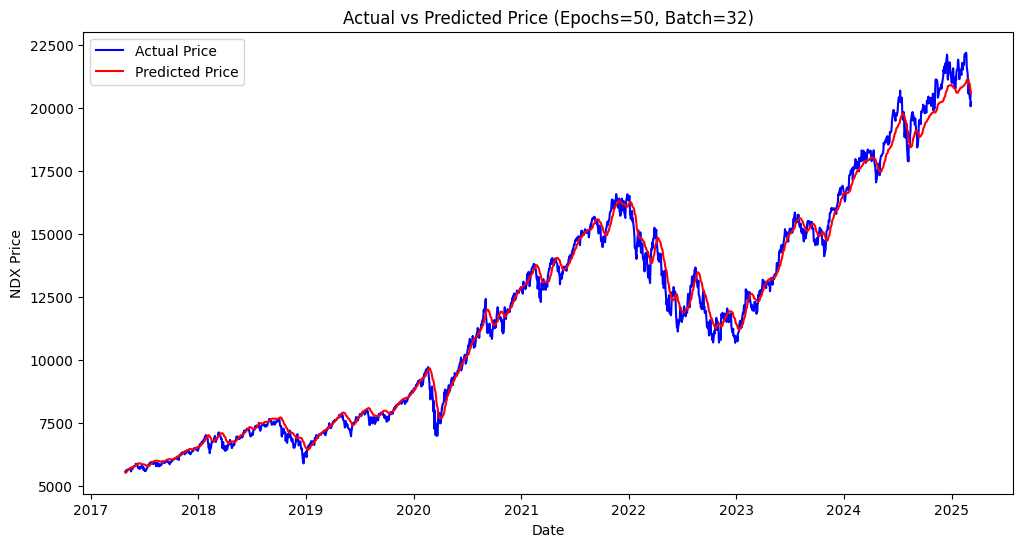

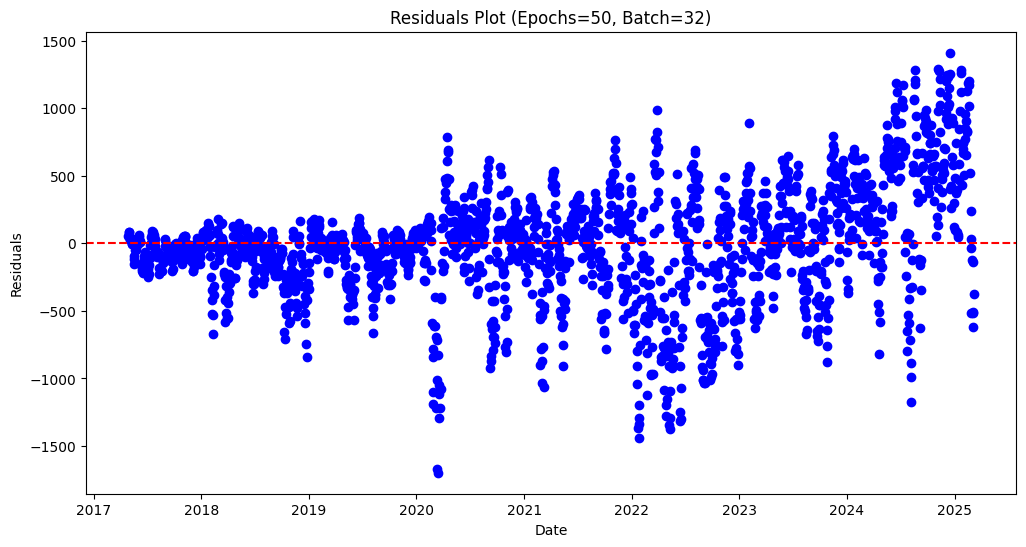

Metrics for Epochs=50, Batch=32
MSE: 176284.4253, RMSE: 419.8624, MAE: 300.6908, MAPE: 2.47%
R2 Score: 0.9913, Explained Variance: 0.9913, Directional Accuracy: 52.41%

Training model with epochs=20 and batch_size=64
Epoch 1/20


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0010 - val_loss: 6.9388e-04
Epoch 2/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 5.3549e-05 - val_loss: 3.7216e-04
Epoch 3/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.6329e-05 - val_loss: 8.2594e-04
Epoch 4/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.7507e-05 - val_loss: 0.0012
Epoch 5/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.9536e-05 - val_loss: 8.6244e-04
Epoch 6/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.7661e-05 - val_loss: 3.2513e-04
Epoch 7/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.8441e-05 - val_loss: 6.7926e-04
Epoch 8/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.4429e-05 - val_loss: 6.1419e-04
Epoch 9/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.6062e-05 - val_loss: 4.6434e-04
Epoch 10/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.3322e-05 - val_loss: 2.6622e-04
Epoch 11/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.8682

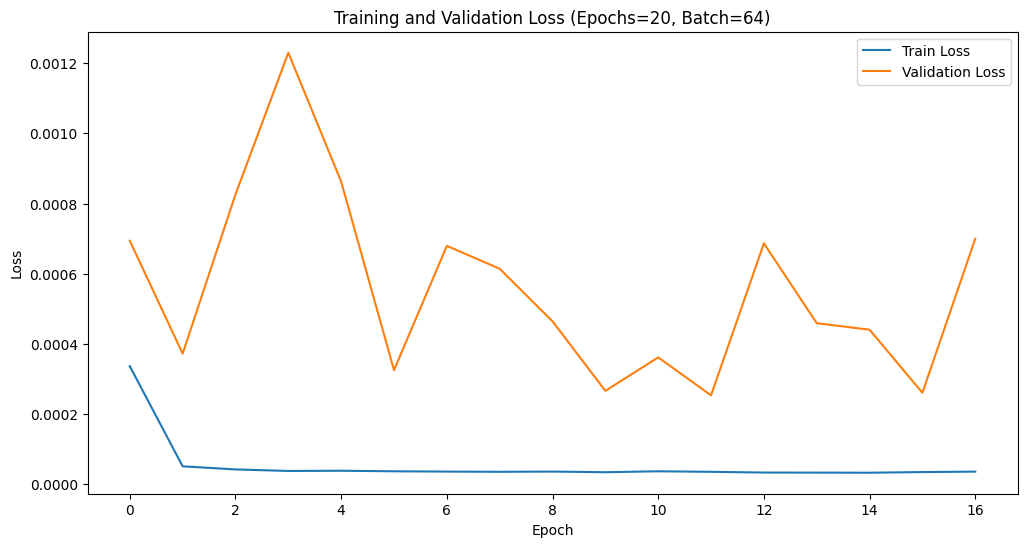

62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


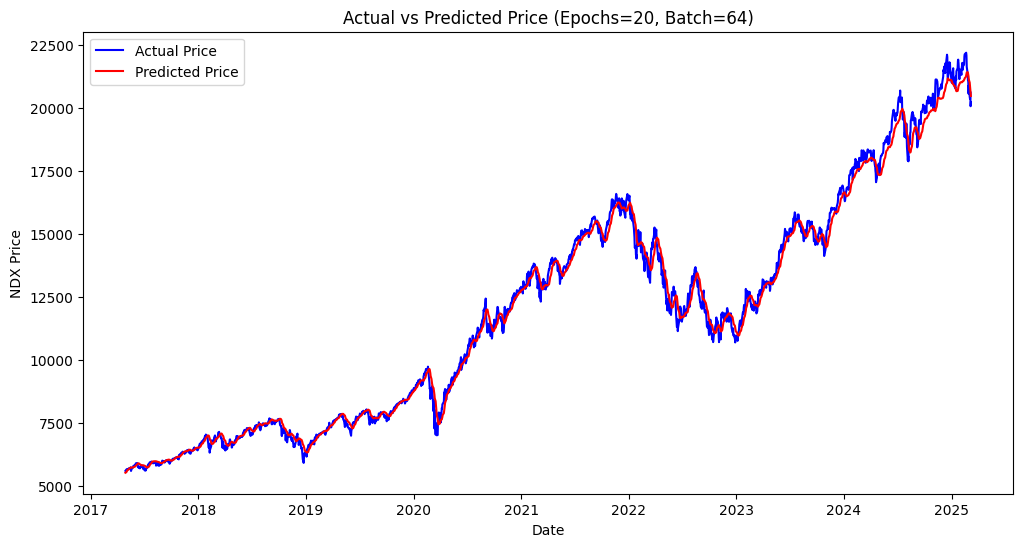

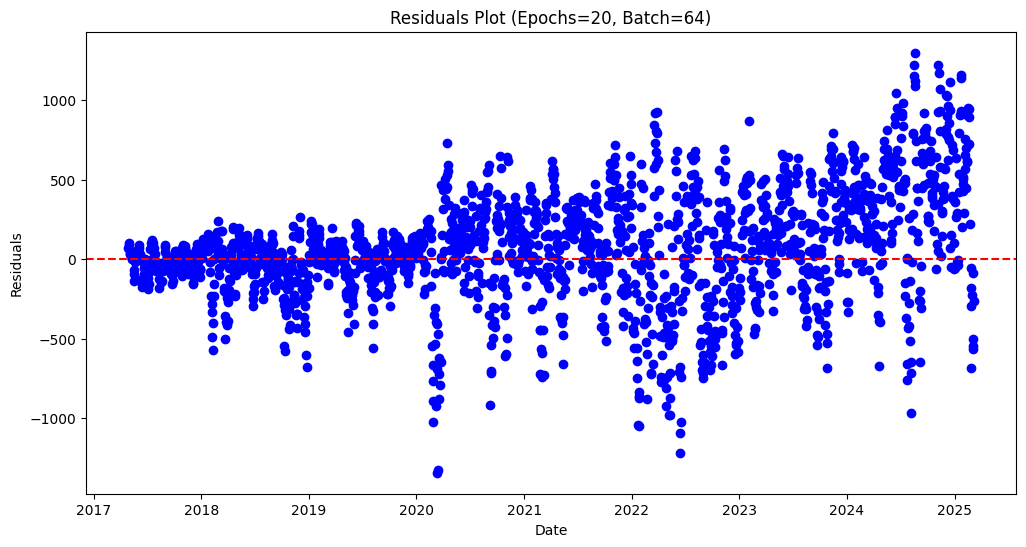

Metrics for Epochs=20, Batch=64
MSE: 123422.6852, RMSE: 351.3156, MAE: 257.8029, MAPE: 2.08%
R2 Score: 0.9939, Explained Variance: 0.9941, Directional Accuracy: 52.56%

Training model with epochs=50 and batch_size=64
Epoch 1/50


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0011 - val_loss: 6.7349e-04
Epoch 2/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 6.3011e-05 - val_loss: 6.4202e-04
Epoch 3/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.7712e-05 - val_loss: 0.0016
Epoch 4/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.8565e-05 - val_loss: 0.0024
Epoch 5/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.9691e-05 - val_loss: 4.5297e-04
Epoch 6/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.5614e-05 - val_loss: 2.8795e-04
Epoch 7/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.8147e-05 - val_loss: 3.5119e-04
Epoch 8/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.7180e-05 - val_loss: 6.2657e-04
Epoch 9/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.4144e-05 - val_loss: 3.1094e-04
Epoch 10/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.8071e-05 - val_loss: 3.7782e-04
Epoch 11/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.6605e-05

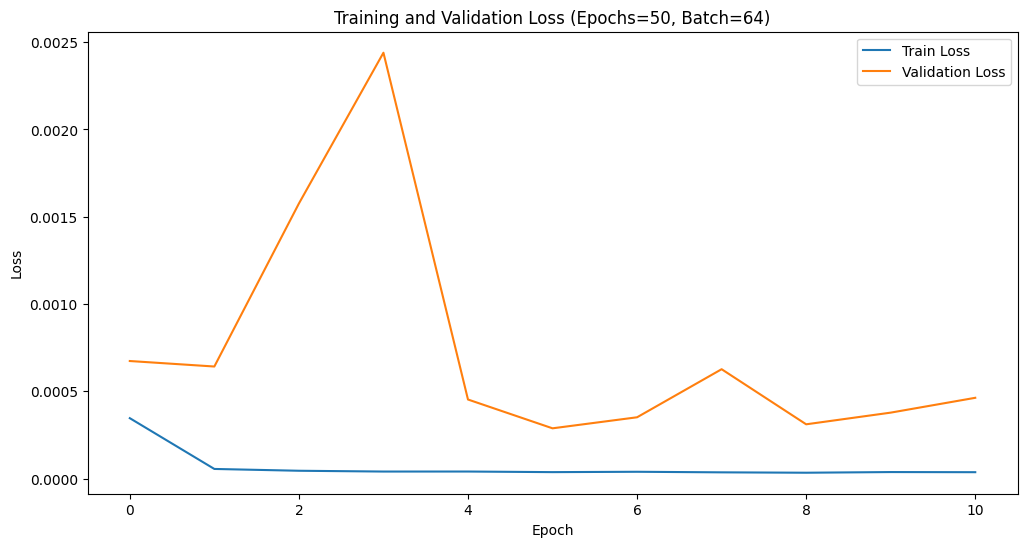

62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


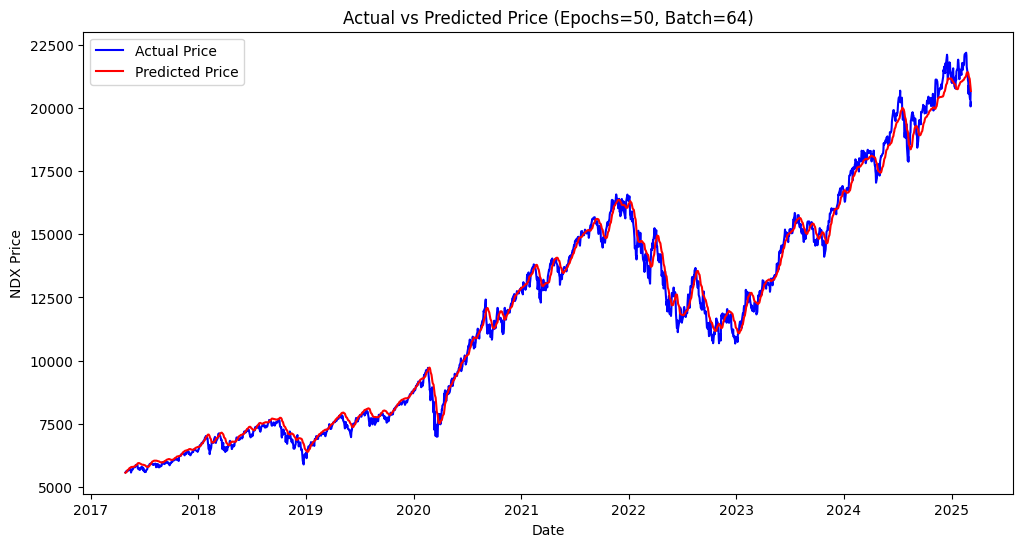

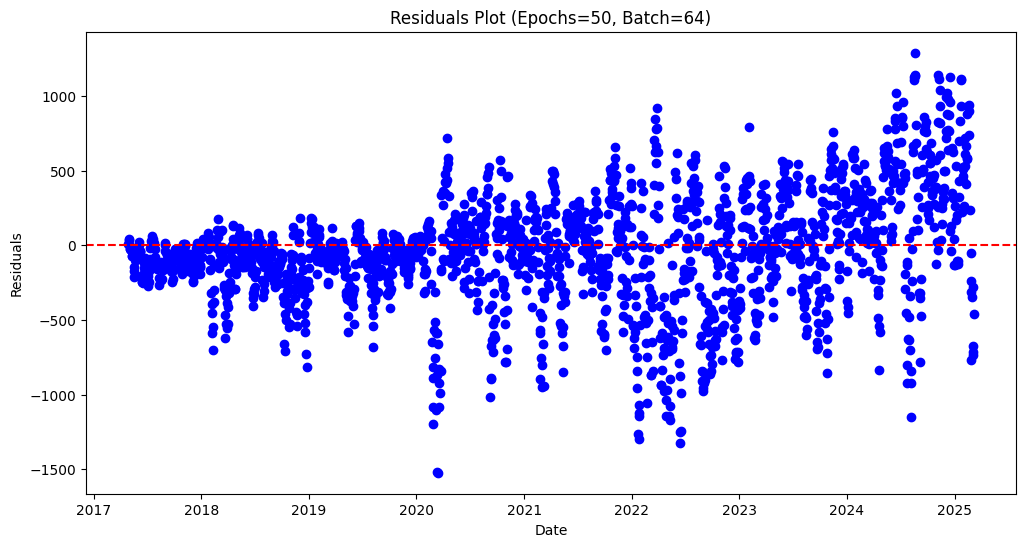

Metrics for Epochs=50, Batch=64
MSE: 140233.9237, RMSE: 374.4782, MAE: 272.9755, MAPE: 2.32%
R2 Score: 0.9931, Explained Variance: 0.9931, Directional Accuracy: 52.66%



In [18]:
for config in configs:
    epochs = config['epochs']
    batch_size = config['batch_size']
    print(f"Training model with epochs={epochs} and batch_size={batch_size}")
    
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
        Dropout(0.2),
        LSTM(50, return_sequences=False),
        Dropout(0.2),
        Dense(25),
        Dense(1)
    ])
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    
    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_test, y_test),
        callbacks=[early_stopping],
        verbose=1
    )
    
    # Store results
    results[epochs, batch_size] = history.history
    
    # Plot training & validation loss
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f"Training and Validation Loss (Epochs={epochs}, Batch={batch_size})")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    # Predictions
    y_pred = model.predict(X_test)
    y_pred = scaler.inverse_transform(y_pred)
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
    
    # Plot actual vs predicted
    plt.figure(figsize=(12, 6))
    plt.plot(test_dates, y_test_inv, label='Actual Price', color='blue')
    plt.plot(test_dates, y_pred, label='Predicted Price', color='red')
    plt.xlabel('Date')
    plt.ylabel('NDX Price')
    plt.legend()
    plt.title(f'Actual vs Predicted Price (Epochs={epochs}, Batch={batch_size})')
    plt.show()
    
    # Residuals plot
    residuals = y_test_inv - y_pred
    plt.figure(figsize=(12, 6))
    plt.scatter(test_dates, residuals, color='blue')
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f'Residuals Plot (Epochs={epochs}, Batch={batch_size})')
    plt.xlabel('Date')
    plt.ylabel('Residuals')
    plt.show()
    
    # Compute metrics
    mse = mean_squared_error(y_test_inv, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_inv, y_pred)
    r2 = r2_score(y_test_inv, y_pred)
    evs = explained_variance_score(y_test_inv, y_pred)
    mape = np.mean(np.abs((y_test_inv - y_pred) / y_test_inv)) * 100
    directional_accuracy = np.mean((np.sign(np.diff(y_test_inv.flatten())) == np.sign(np.diff(y_pred.flatten())))) * 100
    
    # Print evaluation
    print(f"Metrics for Epochs={epochs}, Batch={batch_size}")
    print(f"MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}, MAPE: {mape:.2f}%")
    print(f"R2 Score: {r2:.4f}, Explained Variance: {evs:.4f}, Directional Accuracy: {directional_accuracy:.2f}%\n")